In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jsmetrics

  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
Using cached toolz-1.0.0-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter

### **<font color="Purple"> Datos de HadGEM3 </font>**

##### **<font color="olive"> Temperatura </font>**

In [8]:
tas_file = 'tasday79.nc'

In [10]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
# tas=tas_ds['tas']

In [11]:
tas_ds

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 12960, lat: 144, lon: 192)
Coordinates:
  * time     (time) object 104kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
    height   float64 8B ...
Data variables:
    tas      (time, lat, lon) float32 1GB ...

In [10]:
latsHG=tas.lat
lonsHG=tas.lon

##### **<font color="olive"> Viento </font>**

In [11]:
u_99= 'uaday200hpa_99_mx.nc'
u_14='uaday200hpa_14_mx.nc'

In [12]:
# Abrir archivos y seleccionar variables a usar 
u_ds99=xr.open_dataset(u_99)
ua99=u_ds99['ua']  
u_ds14=xr.open_dataset(u_14)
ua14=u_ds14['ua']

In [13]:
uHG = xr.concat([ua99, ua14], dim='time')

In [14]:
latsuHG = ua99.lat
lonsuHG = ua99.lon

In [15]:
u_seasonHG=uHG.groupby(uHG.time.dt.season).mean(dim='time') 
u_DJFHG = u_seasonHG[0]

In [16]:
u_inviernosHG = uHG.sel(time=uHG ['time.month'].isin([12, 1, 2]))

### **<font color="Purple"> Datos de ERA-5 </font>**

##### **<font color="olive"> Temperatura </font>**

In [17]:
filet2m_era5 = 't2m_daily.nc'

In [18]:
t2m_ds=xr.open_dataset(filet2m_era5)
t2m=t2m_ds['t2m']

In [19]:
t2m=t2m-273.15

In [20]:
latsE5_t=t2m.latitude
lonsE5_t=t2m.longitude

##### **<font color="olive"> Viento </font>**

In [21]:
fileu_era5 = 'u_daily_500.nc'

In [22]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']

In [23]:
lonsuE5 = u_era5.longitude
latsuE5 = u_era5.latitude

In [24]:
#Seleccionar solo 200 hPa 
u200E5 = u_era5.sel(level=200)

In [25]:
u_inviernosE5 = u200E5.sel(time=u200E5['time.month'].isin([12, 1, 2]))

In [26]:
u200E5_season = u200E5.groupby(u200E5.time.dt.season).mean(dim='time')
uE5_DJF = u200E5_season[0]

### Climatología diaria HadGEM3

##### **<font color="olive"> Temperatura </font>**

In [27]:
regionHG = tas.sel(lat=slice(5, 50), lon=slice(227,297))

In [28]:
tas_climday = regionHG.groupby('time.dayofyear').mean('time') #este es el ciclo anual 

In [29]:
tasclimdaysuav = tas_climday.rolling(dayofyear=7, center=True, min_periods=1).mean()

In [30]:
anomaliasday = regionHG.groupby('time.dayofyear') - tasclimdaysuav #es el suavizado o no?

##### **<font color="olive"> Viento </font>**

In [31]:
uregionHG = uHG.sel(lat=slice(5, 50), lon=slice(227,297))

In [32]:
u_climdayHG = uregionHG.groupby('time.dayofyear').mean('time') #este es el ciclo anual 

In [33]:
uclimdaysuav = u_climdayHG.rolling(dayofyear=7, center=True, min_periods=1).mean()

In [34]:
uanomaliasday = uregionHG.groupby('time.dayofyear') - uclimdaysuav #es el suavizado o no?

### Climatología diaria ERA5

##### **<font color="olive"> Temperatura </font>**

In [35]:
regionE5 = t2m.sel(latitude=slice(50, 5), longitude=slice(227,297))

In [36]:
t2m_climday = regionE5.groupby('time.dayofyear').mean('time') #este es el ciclo anual 

In [37]:
t2mclimdaysuav = t2m_climday.rolling(dayofyear=7, center=True, min_periods=1).mean()

In [38]:
anomaliasdayE5 = regionE5.groupby('time.dayofyear') - t2mclimdaysuav

##### **<font color="olive"> Viento </font>**

In [39]:
uregionE5 = u200E5.sel(latitude=slice(50, 5), longitude=slice(227,297))

In [40]:
u_climdayE5 = uregionE5.groupby('time.dayofyear').mean('time') #este es el ciclo anual 

In [41]:
uclimdaysuav = u_climdayE5.rolling(dayofyear=7, center=True, min_periods=1).mean()

In [42]:
uanomaliasdayE5 = uregionE5.groupby('time.dayofyear') - uclimdaysuav

In [92]:
t2m

<xarray.DataArray 't2m' (time: 14761, latitude: 89, longitude: 259)> Size: 3GB
array([[[ 6.07129043,  6.20102691,  6.31954747, ..., 12.18547794,
         12.29378698, 12.29947864],
        [ 6.42551288,  6.54235942,  6.62070351, ..., 12.50396008,
         12.37907825, 12.36133365],
        [ 6.77077933,  6.86778874,  6.88720736, ..., 12.22054864,
         12.24038577, 12.34543047],
        ...,
        [26.07732577, 26.05012296, 26.01304344, ..., 25.50832666,
         25.41993845, 25.36787646],
        [26.09147123, 26.02936512, 25.98140447, ..., 25.44320732,
         25.47944983, 25.48815473],
        [26.13332171, 26.04267357, 25.95629419, ..., 25.45542766,
         25.54431808, 25.64802356]],

       [[ 5.5700054 ,  5.80863683,  6.02207427, ..., 11.59982234,
         11.72939142, 11.84657276],
        [ 5.63956089,  5.84730667,  6.08710991, ..., 11.8408811 ,
         11.89001356, 11.96208008],
        [ 6.21626049,  6.19282422,  6.19207091, ..., 12.05532295,
         12.01447688, 12.02820384],
...
        [27.43179772, 27.38968151, 27.28775867, ..., 26.80906211,
         26.61706413, 26.50280667],
        [27.52325238, 27.45524972, 27.28572995, ..., 27.09632873,
         26.86359408, 26.7766026 ],
        [27.63604916, 27.60139864, 27.59563708, ..., 27.07271444,
         26.96056685, 26.87341308]],

       [[ 8.61696988,  8.70079655,  8.78364944, ..., 14.29089146,
         14.40936866, 14.54180344],
        [ 8.89587818,  8.99496082,  9.10345672, ..., 14.69760907,
         14.77380776, 14.80407625],
        [ 9.10946173,  9.21755188,  9.31290168, ..., 15.49797933,
         15.654353  , 15.66035801],
        ...,
        [27.60440114, 27.70129277, 27.80053771, ..., 27.03189661,
         26.93565418, 26.91236448],
        [27.58192294, 27.65487568, 27.74381472, ..., 27.18048   ,
         27.18916292, 27.19386955],
        [27.56147345, 27.59523133, 27.64367715, ..., 27.3577089 ,
         27.37880758, 27.22332655]]])
Coordinates:
  * time       (time) datetime64[ns] 118kB 1979-01-01T11:30:00 ... 2019-05-31...
  * longitude  (longitude) float32 1kB 195.5 196.0 196.5 ... 323.5 324.0 324.5
  * latitude   (latitude) float32 356B 44.5 44.0 43.5 43.0 ... 2.0 1.5 1.0 0.5

### **<font color="darkgreen"> CAOs de HadGEM </font>**

In [43]:
def CAOS_MXHG(Tdias):
    mean = Tdias.mean()
    desv_est = Tdias.std()
    condicionCAO = mean - 2 * desv_est  
    dias_CAO = []
    temp_list = []

    for i in range(len(Tdias) - 1):
        if Tdias[i] < condicionCAO and Tdias[i + 1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)
            dias_CAOS = pd.DataFrame(dias_CAO).drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
    
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAO]

    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = pd.to_datetime([str(date) for date in dias_CAO_dates],errors='coerce')    
    fechas_indices = {fecha: dias_CAO[i] for i, fecha in enumerate(fechas_CAO_datetime)}
    
    # Imprimir las fechas y sus índices
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values 
        temp_list.append(temperatura)
     #   print(f"Índice: {indice}, Fecha: {fecha}, Temperatura: {temperatura}")
    
    #print(pd.DataFrame(dias_CAO).drop_duplicates().size)
    #print(len(fechas_CAO_datetime),len(dias_CAO),len(dias_CAO_dates))
    promedioT=np.mean(temp_list)
    
    dicc={'fechas':fechas_indices,'temperaturas':temp_list,'freq':len(dias_CAOS)/36,'promedioT':promedioT}
    
    return dicc

In [44]:
tas_inviernos = tas.sel(time=tas['time.month'].isin([12, 1, 2]))

In [45]:
tas_estacion=tas.groupby(tas.time.dt.season).mean(dim='time') #tas ya está a partir de 1979
tas_djf = tas_estacion[0]

In [46]:
#Elegir un cuadro de 4x4
latitudes = tas_inviernos.sel(lat=slice(22,27))
longitudes = latitudes.sel(lon=slice(255,262))

In [47]:
weights = np.cos(np.deg2rad(longitudes))
weights.name = "weights"

In [48]:
tas_weighted = longitudes.weighted(weights)

In [49]:
norte = tas_weighted.mean(['lon','lat']) 

In [50]:
CAOsHG = CAOS_MXHG(norte) #esto llamó a mi función con el que ya está pesado
fechas_caoHG = CAOsHG['fechas']

In [51]:
indicesHG=[fechas_caoHG[key] for key in CAOsHG['fechas'].keys()]

##### **<font color="olive"> Temperatura </font>**

In [52]:
# MÉTODO 1: CICLO ANUAL
tempsHGday = anomaliasday.isel(time=indicesHG) 
#aquí está seleccionando las fechas de la serie del ciclo anual, falta el promedio

In [53]:
# MÉTODO 2: SIN CICLO ANUAL
tempsHG = tas_inviernos.isel(time=indicesHG)
#a este le va a faltar promedio y después anomalía

In [54]:
tempsCAOHG = tempsHG.mean('time') #temperatura promedio en CAOs

In [55]:
tempsHGday_mean = tempsHGday.mean('time') #este ya se mapea 

In [56]:
anomaliaHG = tempsCAOHG - tas_djf #este ya se mapea

##### **<font color="olive"> Viento </font>**

In [57]:
# MÉTODO 1: CICLO ANUAL
usHGday = uanomaliasday.isel(time=indicesHG) 
#aquí está seleccionando las fechas de la serie del ciclo anual, falta el promedio

In [58]:
# MÉTODO 2: SIN CICLO ANUAL
usHG = u_inviernosHG.isel(time=indicesHG)
#a este le va a faltar promedio y después anomalía

In [59]:
usCAOHG = usHG.mean('time') #temperatura promedio en CAOs

In [60]:
usHGday_mean = usHGday.mean('time') #este ya se mapea 

In [61]:
uanomaliaHG = usCAOHG - u_DJFHG #este ya se mapea

### **<font color="darkgreen"> CAOs de ERA5</font>**

In [62]:
def CAOS_MXgp(Tdias, mean_mv, std_mv):
    """
    Tdias son todos los días
    mean_mv es el promedio móvil para cada 10 años
    std_mv es la desviación estándar para cada 10 años
    """
    
    # Usar la temperatura suavizada (promedio móvil de 10 años)
    mean = mean_mv.values  # Temperaturas suavizadas (promedio móvil)
    desv_est = std_mv.values  # Desviación estándar suavizada (promedio móvil)
    
    dias_CAO = []
    temp_list = []

    for i in range(len(Tdias)-1): 
        # Obtener el año del día actual
        year = Tdias['time'].dt.year[i]  # Año del día actual
        
        # Calcular el índice para la serie de 1979 a 2014
        index = year - 1979  # Calculamos el índice para la serie de 1979 a 2014
        
        # Verificar que el índice esté dentro del rango correcto
        if index < 0 or index >= len(mean):
            continue  # Si el índice está fuera de rango, se salta esa iteración
        
        # Obtener la temperatura media suavizada y la desviación estándar suavizada para el año correspondiente
        Tmean_suavizada = mean[index]  # Obtener el promedio para ese año
        Tstd_suavizada = desv_est[index]  # Desviación estándar para ese año
        
        # Condición de CAO con la temperatura suavizada y la desviación estándar suavizada
        condicionCAO = Tmean_suavizada - 2 * Tstd_suavizada
        
        # Verificar si los días cumplen la condición de CAO (temperatura inferior al umbral)
        if Tdias[i] < condicionCAO and Tdias[i+1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)

    # Eliminar duplicados en los índices de días CAO
    dias_CAOS = list(set(dias_CAO))  # Eliminar duplicados, pero convertir en lista

    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAOS]  # Aquí accedes correctamente con los índices de días_CAOS
    
    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = [pd.to_datetime(str(date)) for date in dias_CAO_dates]
    
    # Crear el diccionario con fechas y sus índices
    fechas_indices = {fecha: dias_CAOS[i] for i, fecha in enumerate(fechas_CAO_datetime)}
        
    # Obtener las temperaturas de los días identificados como CAO
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values  # Obtener la temperatura del día indicado
        temp_list.append(temperatura)

    # Promedio de las temperaturas en los días CAO
    promedioT = np.mean(temp_list)
   
    return {'fechas': fechas_indices, 'temperaturas': temp_list, 'freq': len(dias_CAOS) / 36, 'promedioT': promedioT}


In [63]:
t2m_inviernos = t2m.sel(time=t2m['time.month'].isin([12, 1, 2]))

In [64]:
t2m_estacion=t2m.groupby(t2m.time.dt.season).mean(dim='time')
t2m_djf = t2m_estacion[0]

In [65]:
#Elegir un cuadro de 4x4 (el mismo de las simulaciones)
mx_slicedE5 = t2m_inviernos.sel(latitude=slice(27,22)) 
mx_slicedE5 = mx_slicedE5.sel(longitude=slice(255,262)) 

In [66]:
mx_slicedE5 = mx_slicedE5.rename({'latitude': 'lat', 'longitude': 'lon'})

In [67]:
mx_slicedE5=mx_slicedE5.rename('ua') 

In [68]:
weights = np.cos(np.deg2rad(mx_slicedE5))
weights.name = "weights"

In [69]:
t2m_weighted = mx_slicedE5.weighted(weights)

In [70]:
norteE5 = t2m_weighted.mean(['lon','lat']) #promedio a variable ya pesada

In [71]:
CAOsE5 = E5_CAOS_MX(norteE5) #esto llamó a mi función con el que ya está pesado
fechas_caoE5 = CAOsE5['fechas']

<xarray.DataArray 'ua' ()> Size: 8B
array(8.03601693)


In [72]:
indicesE5=[fechas_caoE5[key] for key in CAOsE5['fechas'].keys()]

##### **<font color="olive"> Temperatura </font>**

In [73]:
# MÉTODO 1: CICLO ANUAL
tempsE5day = anomaliasdayE5.isel(time=indicesE5) 
#aquí está seleccionando las fechas de la serie del ciclo anual, falta el promedio

In [74]:
# MÉTODO 2: SIN CICLO ANUAL
tempsE5 = t2m_inviernos.isel(time=indicesE5)
#a este le va a faltar promedio y anomalía

In [75]:
tempsCAOE5=tempsE5.mean('time') # temperatura promedio en CAOs, falta anomalía

In [76]:
tempsE5day_mean = tempsE5day.mean('time') #este ya se mapea 

In [77]:
anomaliaE5 = tempsCAOE5 - t2m_djf #este ya se mapea 

##### **<font color="olive"> Viento </font>**

In [78]:
# MÉTODO 2: CICLO ANUAL
usE5day = uanomaliasdayE5.isel(time=indicesE5) 
#aquí está seleccionando las fechas de la serie del ciclo anual, falta el promedio

In [79]:
# MÉTODO 1: SIN CICLO ANUAL
usE5 = u_inviernosE5.isel(time=indicesE5)
#a este le va a faltar promedio y anomalía

In [80]:
usCAOE5 = usE5.mean('time') # viento promedio en CAOs, falta anomalía

In [81]:
usE5day_mean = usE5day.mean('time') #este ya se mapea 

In [82]:
uanomaliaE5 = usCAOE5 - uE5_DJF #este ya se mapea 

## Mapitas

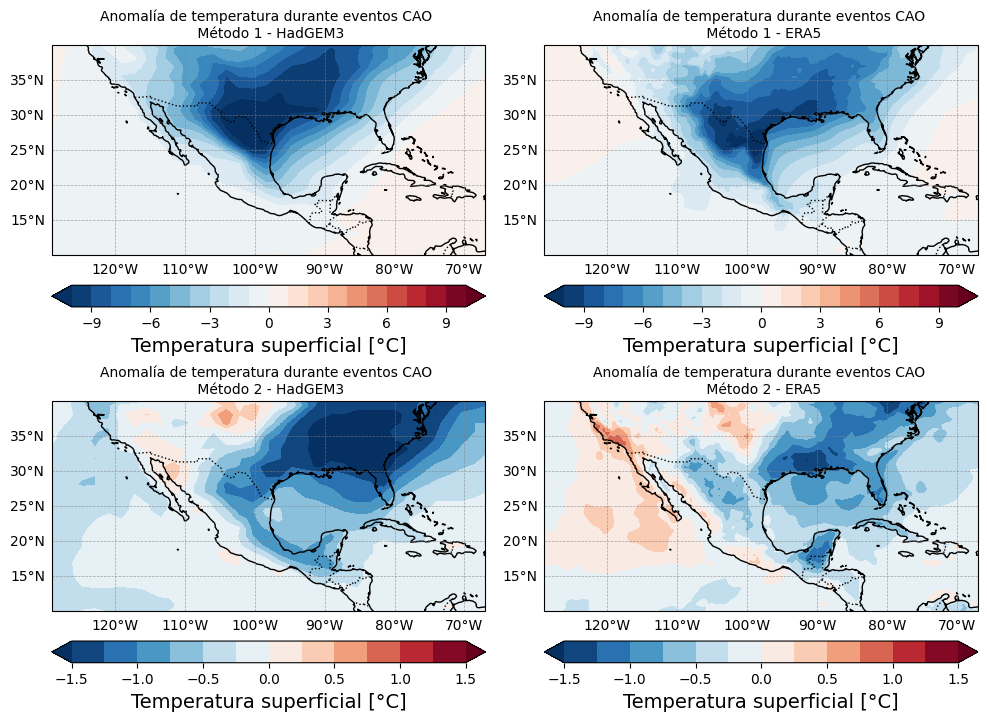

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.2, hspace=0.45)
axs = axs.flatten()

# MÉTODO 1: SIN CICLO ANUAL HG ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[0]
ax.coastlines()
cs = ax.contourf(anomaliaHG .lon, anomaliaHG.lat, anomaliaHG, levels=np.arange(-10, 10.1, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
ax.set_title('Anomalía de temperatura durante eventos CAO \n Método 1 - HadGEM3', fontsize=10)

# MÉTODO 1: SIN CICLO ANUAL E5 ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[1]
ax.coastlines()
cs = ax.contourf(anomaliaE5.longitude, anomaliaE5.latitude, anomaliaE5, levels=np.arange(-10, 10.1, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
ax.set_title('Anomalía de temperatura durante eventos CAO \n Método 1 - ERA5', fontsize=10)

# MÉTODO 2: CICLO ANUAL HG  -------------------------------------------------------------------------------------------
ax = axs[2]
ax.coastlines()
cs = ax.contourf(tempsHGday_mean.lon, tempsHGday_mean.lat, tempsHGday_mean, levels=np.arange(-1.5, 1.51, 0.25), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
ax.set_title('Anomalía de temperatura durante eventos CAO \n Método 2 - HadGEM3', fontsize=10)

# MÉTODO 2: CICLO ANUAL E5 -------------------------------------------------------------------------------------------
ax = axs[3]
ax.coastlines()
cs = ax.contourf(tempsE5day_mean.longitude, tempsE5day_mean.latitude, tempsE5day_mean, levels=np.arange(-1.5, 1.51, 0.25), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
ax.set_title('Anomalía de temperatura durante eventos CAO \n Método 2 - ERA5', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=.89)



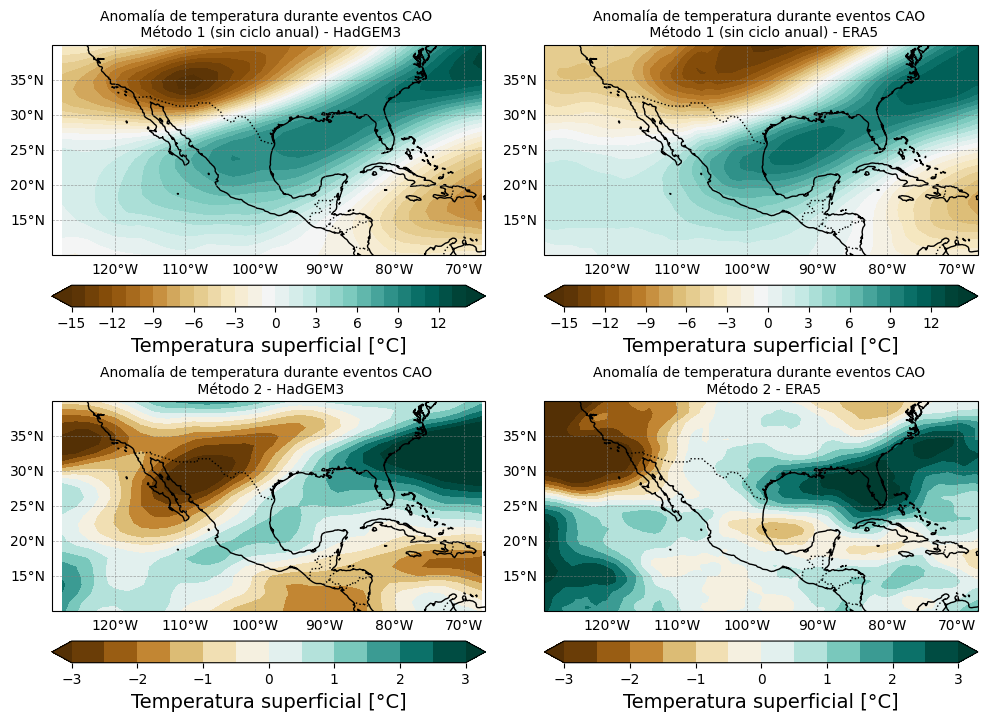

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.2, hspace=0.45)
axs = axs.flatten()


# MÉTODO 1: SIN CICLO ANUAL HG ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[0]
ax.coastlines()
cs = ax.contourf(uanomaliaHG.lon, uanomaliaHG.lat, uanomaliaHG, levels=np.arange(-15, 15, 1), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
ax.set_title('Anomalía de temperatura durante eventos CAO \n Método 1 (sin ciclo anual) - HadGEM3', fontsize=10)


# MÉTODO 1: SIN CICLO ANUAL E5 ( YA OK ) -------------------------------------------------------------------------------------------
ax = axs[1]
ax.coastlines()
cs = ax.contourf(uanomaliaE5.longitude, uanomaliaE5.latitude, uanomaliaE5, levels=np.arange(-15, 15, 1), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
ax.set_title('Anomalía de temperatura durante eventos CAO \n Método 1 (sin ciclo anual) - ERA5', fontsize=10)

# MÉTODO 2: CICLO ANUAL HG  -------------------------------------------------------------------------------------------
ax = axs[2]
ax.coastlines()
cs = ax.contourf(usHGday_mean .lon, usHGday_mean .lat, usHGday_mean, levels=np.arange(-3, 3.1, 0.5), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
ax.set_title('Anomalía de temperatura durante eventos CAO \n Método 2 - HadGEM3', fontsize=10)

# MÉTODO 2: CICLO ANUAL E5 -------------------------------------------------------------------------------------------
ax = axs[3]
ax.coastlines()
cs = ax.contourf(usE5day_mean.longitude, usE5day_mean.latitude, usE5day_mean, levels=np.arange(-3, 3.1, 0.5), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
ax.set_title('Anomalía de temperatura durante eventos CAO \n Método 2 - ERA5', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=.89)

